<a href="https://colab.research.google.com/github/Geoffrey-Z/Multivariate-Time-Series-Forecasting-with-LSTMs-in-Keras-for-CORN-SWEET-Terminal-Market-Price/blob/master/CORN_SWEET_Price_Monthly_Univariate_Forecasting_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving BI-COLOR PRICE.csv to BI-COLOR PRICE.csv


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
 - 1s - loss: 0.0507 - mean_absolute_error: 0.1669
Epoch 2/1000
 - 0s - loss: 0.0265 - mean_absolute_error: 0.1172
Epoch 3/1000
 - 0s - loss: 0.0234 - mean_absolute_error: 0.1144
Epoch 4/1000
 - 0s - loss: 0.0221 - mean_absolute_error: 0.1129
Epoch 5/1000
 - 0s - loss: 0.0207 - mean_absolute_error: 0.1078
Epoch 6/1000
 - 0s - loss: 0.0196 - mean_absolute_error: 0.1039
Epoch 7/1000
 - 0s - loss: 0.0184 - mean_absolute_error: 0.1012
Epoch 8/1000
 - 0s - loss: 0.0177 - mean_absolute_error: 0.0985
Epoch 9/1000
 - 0s - loss: 0.0169 - mean_absolute_error: 0.0968
Epoch 10/1000
 - 0s - loss: 0.0162 - mean_absolute_error: 0.0944
Epoch 11/1000
 - 0s - loss: 0.0157 - mean_absolute_error: 0.0951
Epoch 12/1000
 - 0s - loss: 0.0154 - mean_absolute_error: 0.0925
Epoch 13/1000
 - 0s - loss: 0.0151 - mean_absolute_error: 0.0915
Epoch 14/1000
 - 0s - loss: 0.0151 - mean_ab

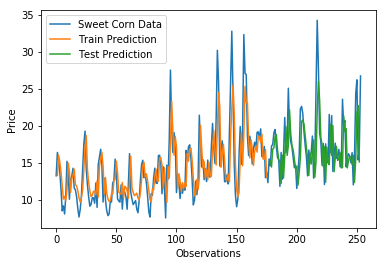

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def create_dataset(dataset, lookback=1):
    dataX = []
    dataY = []
    for i in range(len(dataset) - lookback - 1):
        a = dataset[i: (i+lookback), 0]
        dataX.append(a)
        dataY.append(dataset[i+lookback,0])
    return np.array(dataX), np.array(dataY)



np.random.seed(7)

import io

np.random.seed(7)

df = pd.read_csv(io.BytesIO(uploaded['BI-COLOR PRICE.csv']), usecols=[1])
df = df.dropna()
dataset = df.values
dataset = dataset.astype("float32")

scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

train_dataset = dataset[:int(len(dataset)*0.7), :]
test_dataset = dataset[int(len(dataset)*0.7):, :]

lookback = 1
trainX, trainY = create_dataset(train_dataset, lookback)
testX, testY = create_dataset(test_dataset, lookback)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(4, input_shape=(1, lookback)))
#return_sequences=True, model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.fit(trainX, trainY, epochs=1000, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(trainPredict)+lookback, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookback*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label="Sweet Corn Data")
plt.plot(trainPredictPlot, label="Train Prediction")
plt.plot(testPredictPlot, label="Test Prediction")
plt.xlabel("Observations")
plt.ylabel("Price")
plt.legend()
plt.show()

In [3]:
from sklearn.metrics import r2_score
trainScore = math.sqrt(r2_score(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f R2' % (trainScore))
testScore = math.sqrt(r2_score(testY[0], testPredict[:,0]))
print('Test Score: %.2f R2' % (testScore))

Train Score: 0.73 R2
Test Score: 0.22 R2
